# Decision Tree

**References**

- [https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)
- [https://www.datacamp.com/tutorial/decision-tree-classification-python](https://www.datacamp.com/tutorial/decision-tree-classification-python)

## Decision Tree Classifier



### Importing Required Libraries

In [49]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading Data

In [50]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("dataset/diabetes.csv", 
                #    header=None, 
                #    names=col_names
                   )

pima.columns = col_names

In [51]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data

In [53]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [54]:
X_train.shape, y_train.shape

((537, 7), (537,))

### Building Decision Tree Model

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating the Model

In [56]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.7012987012987013


### Visualizing Decision Trees

`pip install graphviz`

`pip install pydotplus`


^
Expected {'GRAPH' | 'DIGRAPH'}  (at char 0), (line:1, col:1)


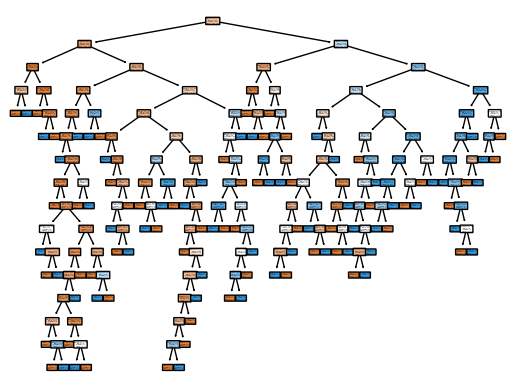

In [57]:
from six import StringIO 
from IPython.display import Image  
# from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import pydotplus

dot_data = StringIO()

plot_tree(clf, 
        #   out_file=dot_data,  
                filled=True, rounded=True,
                # special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# graph.write_png('diabetes.png')

# Image(graph.create_png())

### Optimizing Decision Tree Performance

- **criterion :** optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter :** string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth :** int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


### Visualizing Decision Trees


^
Expected {'GRAPH' | 'DIGRAPH'}  (at char 0), (line:1, col:1)


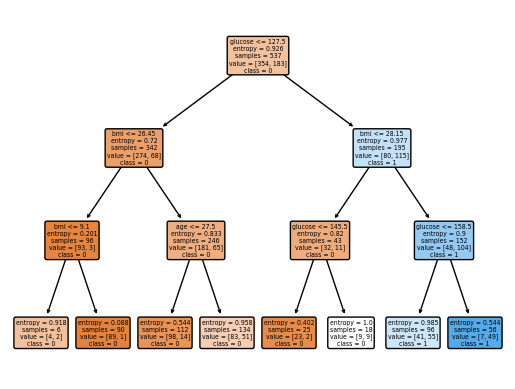

In [59]:
from six import StringIO 
from IPython.display import Image  
# from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import pydotplus

dot_data = StringIO()

plot_tree(clf, 
        #   out_file=dot_data,  
                filled=True, rounded=True,
                # special_characters=True, 
                feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# graph.write_png('diabetes.png')
# Image(graph.create_png())

### Decision Tree Pros

- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. 

### Decision Tree Cons

- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Hands on Exercise


In [103]:
import pandas as pd

df = pd.DataFrame()

df["Fruit"] = ['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Orange']
df["Color"] = ['Red', 'Red', 'Red', 'Yellow', 'Green', 'Yellow', 'Red', 'Yellow', 'Red', 'Green', 'Yellow', 'Red']
df["Size"]  = ['Small', 'Small', 'Small', 'Medium', 'Medium', 'Small', 'Medium', 'Large', 'Medium', 'Large', 'Large', 'Small']
df["Sweetness"] = ['Medium', 'Medium', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Medium', 'High']

In [104]:
df

,Fruit,Color,Size,Sweetness
0,Apple,Red,Small,Medium
1,Orange,Red,Small,Medium
2,Apple,Red,Small,High
3,Orange,Yellow,Medium,High
4,Orange,Green,Medium,High
5,Apple,Yellow,Small,Medium
6,Orange,Red,Medium,Low
7,Apple,Yellow,Large,High
8,Orange,Red,Medium,Medium
9,Apple,Green,Large,High


In [105]:
y = df['Fruit']
X = df.drop(columns=['Fruit'])


### Let’s look at how Entropy works mathematically.

Let’s assume we have a dataset of 12 fruits with the following features: “color,” “size,” and “sweetness,” and their corresponding labels as “Apple” or “Orange.” The dataset is as follows:

**Fruit** | **Color** | **Size** | **Sweetness**
---|---|---|---
|Apple|Red|Small|Medium|
|Orange|Red|Small|Medium|
|Apple|Red|Small|High|
|Orange|Yellow|Medium|High|
|Orange|Green|Medium|High|
|Apple|Yellow|Small|Medium|
|Orange|Red|Medium|Low|
|Apple|Yellow|Large|High|
|Orange|Red|Medium|Medium|
|Apple|Green|Large|High|
|Orange|Yellow|Large|Medium|
|Orange|Red|Small| High|

### Now, let’s build the decision tree step by step using Entropy and Gini index:


#### Step 1: Calculate the Entropy of the Whole Dataset:

Formula:

$Entropy(H(parent)) = - p_{i} \sum_{i=1}^{n} log_{2}(p_{i}) $

In [7]:
import numpy as np

total_no_of_apples  = 5
total_no_of_oranges = 7

total_entropy = -((5/12)*np.log2(5/12) +(7/12)*np.log2(7/12))

print(f"Entropy(H(parent)) = {total_entropy}")

Entropy(H(parent)) = 0.9798687566511528


#### Step 2: Calculate Information Gain for “Colour” Feature:

In [9]:
no_of_red_fruits    = 6 # RED   : { Apple: 2, Orange: 4}
no_of_green_fruits  = 2 # GREEN : { Apple: 1, Orange: 1}
no_of_yellow_fruits = 4 # YELLOW: { Apple: 2, Orange: 2}

$Information$ $Gain(Color) = H(parent) - [(\frac{Red}{Total}) * H(Red) + (\frac{Green}{Total}) * H(Green) + (\frac{Yellow}{Total}) * H(Yellow)]$

##### Step 2.1: Calculate Entropy for "Red" Fruits:

In [11]:
entropy_of_red_fruits = -(2/no_of_red_fruits)*np.log2(2/no_of_red_fruits) - (4/no_of_red_fruits)*np.log2(4/no_of_red_fruits)

print(f"Entropy(Red) = {entropy_of_red_fruits}")

Entropy(Red) = 0.9182958340544896


##### Step 2.2: Calculate Entropy for "Green" Fruits:

In [12]:
entropy_of_green_fruits = -(1/no_of_green_fruits)*np.log2(1/no_of_green_fruits) -(1/2)*np.log2(1/no_of_green_fruits)

print(f"Entropy(Green) = {entropy_of_green_fruits}")

Entropy(Green) = 1.0


##### Step 2.3: Calculate Entropy for "Yellow" Fruits:

In [13]:
entropy_of_yellow_fruits = -(2/no_of_yellow_fruits)*np.log2(2/no_of_yellow_fruits) -(2/no_of_yellow_fruits)*np.log2(2/no_of_yellow_fruits)

print(f"Entropy(Yellow) = {entropy_of_yellow_fruits}")

Entropy(Yellow) = 1.0


#### Now, we can calculate the Information Gain for the “Colour” feature:

In [16]:
# Information Gain
IG = total_entropy - ((6/12)*entropy_of_red_fruits + (2/12)*entropy_of_green_fruits + (4/12)*entropy_of_yellow_fruits)

print(f"Information Gain = {IG}")

Information Gain = 0.020720839623908027


#### Step 3: Calculate Information Gain for “Size” Feature:

#### Step 4: Calculate Information Gain for “Sweetness” Feature:

